In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("🤖 CODTECH Task 2: Deep Learning Project - Image Classification")
print("="*70)
print(f"TensorFlow version: {tf.__version__}")

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)


🤖 CODTECH Task 2: Deep Learning Project - Image Classification
TensorFlow version: 2.13.0


170498071/170498071 [==============================] - 56s 0us/step
📊 Dataset Information:
Training images: (50000, 32, 32, 3)
Training labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)
Number of classes: 10
Image shape: (32, 32, 3)
Label range: 0 to 9


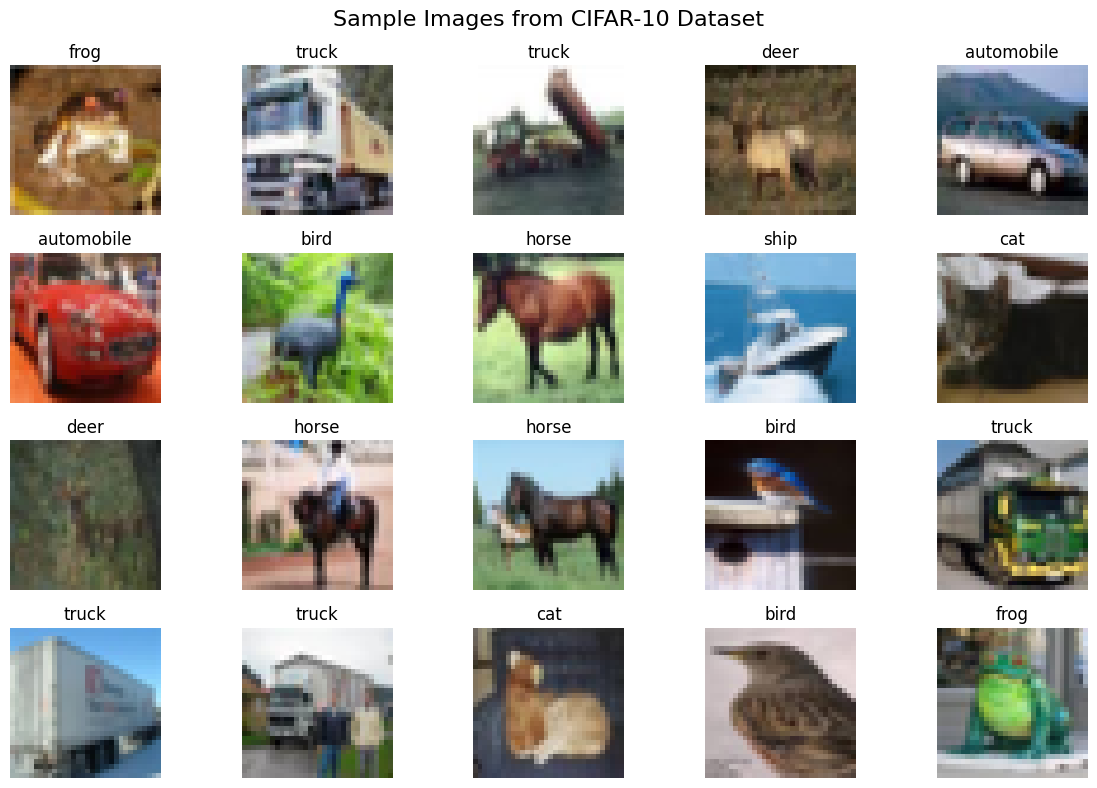

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print("📊 Dataset Information:")
print(f"Training images: {x_train.shape}")
print(f"Training labels: {y_train.shape}")
print(f"Test images: {x_test.shape}")
print(f"Test labels: {y_test.shape}")
print(f"Number of classes: {len(class_names)}")
print(f"Image shape: {x_train[0].shape}")
print(f"Label range: {y_train.min()} to {y_train.max()}")

# Display sample images
plt.figure(figsize=(12, 8))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(f"{class_names[y_train[i][0]]}")
    plt.axis('off')
plt.suptitle("Sample Images from CIFAR-10 Dataset", fontsize=16)
plt.tight_layout()
plt.show()


✅ Data Preprocessing Complete:
Training set: 40000 images
Validation set: 10000 images
Test set: 10000 images
🔄 Data Augmentation Configured:
  • Rotation: ±15 degrees
  • Width/Height shift: ±10%
  • Horizontal flip: enabled
  • Zoom: ±10%


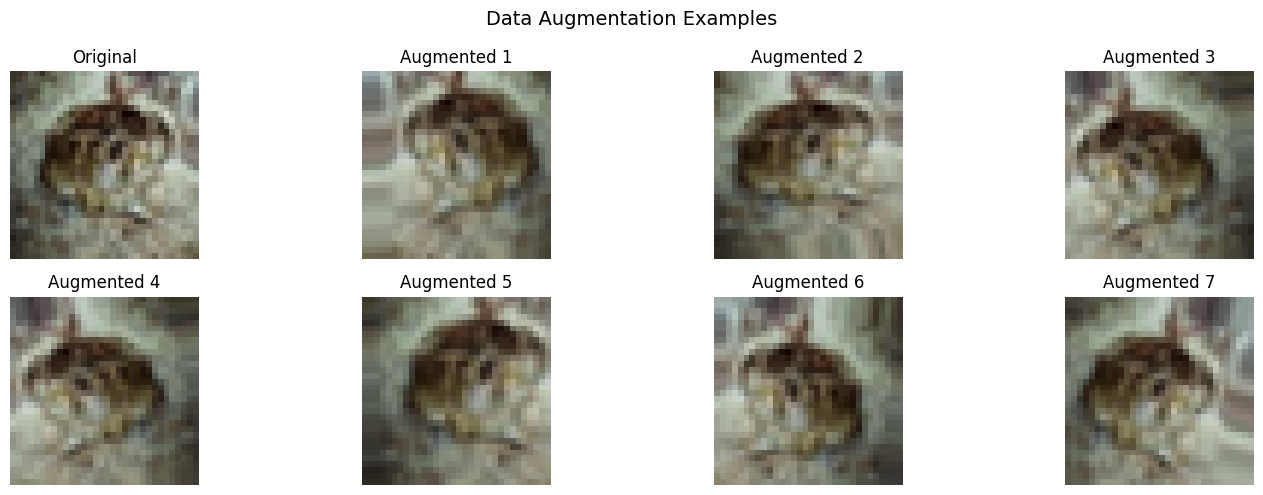

In [3]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# Create validation split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train_cat, y_val_cat = train_test_split(
    x_train, y_train_cat, test_size=0.2, random_state=42, stratify=y_train
)

print("✅ Data Preprocessing Complete:")
print(f"Training set: {x_train.shape[0]} images")
print(f"Validation set: {x_val.shape[0]} images")
print(f"Test set: {x_test.shape[0]} images")

# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

print("🔄 Data Augmentation Configured:")
print("  • Rotation: ±15 degrees")
print("  • Width/Height shift: ±10%")
print("  • Horizontal flip: enabled")
print("  • Zoom: ±10%")

# Show augmented examples
plt.figure(figsize=(15, 5))
sample_img = x_train[0].reshape(1, 32, 32, 3)
augmented_images = []

datagen.fit(sample_img)
for i, batch in enumerate(datagen.flow(sample_img, batch_size=1)):
    augmented_images.append(batch[0])
    if i >= 7:
        break

for i in range(8):
    plt.subplot(2, 4, i+1)
    if i == 0:
        plt.imshow(x_train[0])
        plt.title("Original")
    else:
        plt.imshow(augmented_images[i-1])
        plt.title(f"Augmented {i}")
    plt.axis('off')
plt.suptitle("Data Augmentation Examples", fontsize=14)
plt.tight_layout()
plt.show()


🏗️ CNN Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           

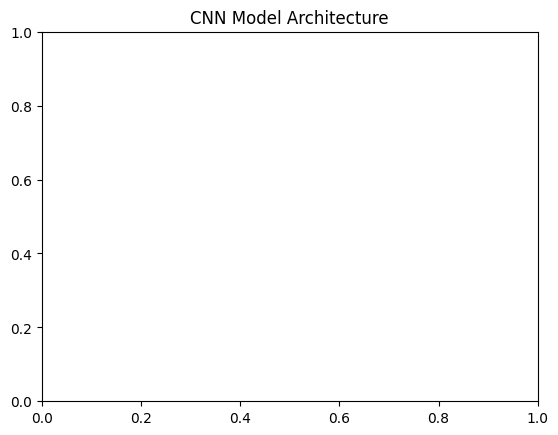

In [4]:
# Build CNN model
def create_cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        
        # Classifier
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

# Create and compile model
model = create_cnn_model()
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("🏗️ CNN Model Architecture:")
print("="*40)
model.summary()

# Visualize model architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=150)
plt.title("CNN Model Architecture")
plt.show()


In [5]:
# Training callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-6
    )
]

print("🚀 Starting Model Training...")
print("="*40)

# Train model (using smaller epochs for demo)
history = model.fit(
    x_train, y_train_cat,
    batch_size=32,
    epochs=10,  # Reduced for demo purposes
    validation_data=(x_val, y_val_cat),
    callbacks=callbacks,
    verbose=1
)

print("\n✅ Training Complete!")


🚀 Starting Model Training...
Epoch 1/10
1250/1250 [==============================] - 143s 112ms/step - loss: 1.8379 - accuracy: 0.3878 - val_loss: 1.5566 - val_accuracy: 0.4827 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 153s 123ms/step - loss: 1.2656 - accuracy: 0.5489 - val_loss: 1.0603 - val_accuracy: 0.6154 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 148s 118ms/step - loss: 1.0973 - accuracy: 0.6139 - val_loss: 1.1631 - val_accuracy: 0.5847 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 115s 92ms/step - loss: 0.9862 - accuracy: 0.6531 - val_loss: 0.8576 - val_accuracy: 0.6968 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 109s 87ms/step - loss: 0.8964 - accuracy: 0.6869 - val_loss: 0.8214 - val_accuracy: 0.7024 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 113s 91ms/step - loss: 0.8443 - accuracy: 0.7048 - val_loss: 0.8258 - val_accuracy: 0.7091 - lr: 0.0010
Epoch 7/

🎯 Final Test Results:
Test Loss: 0.7344
Test Accuracy: 0.7425 (74.25%)


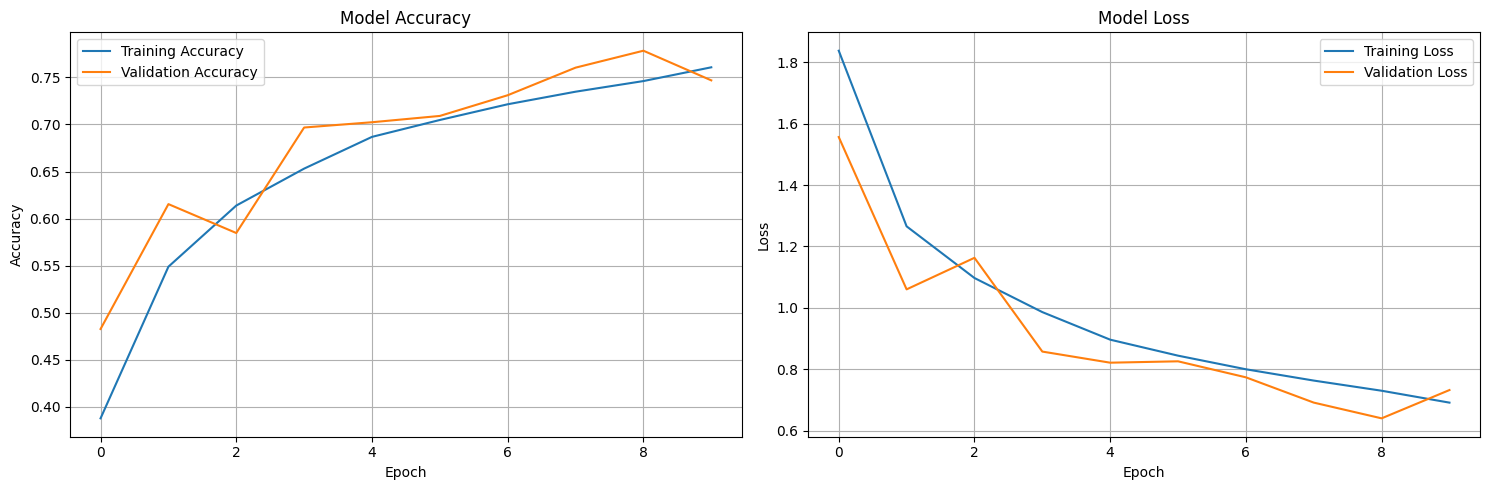

313/313 [==============================] - 6s 17ms/step


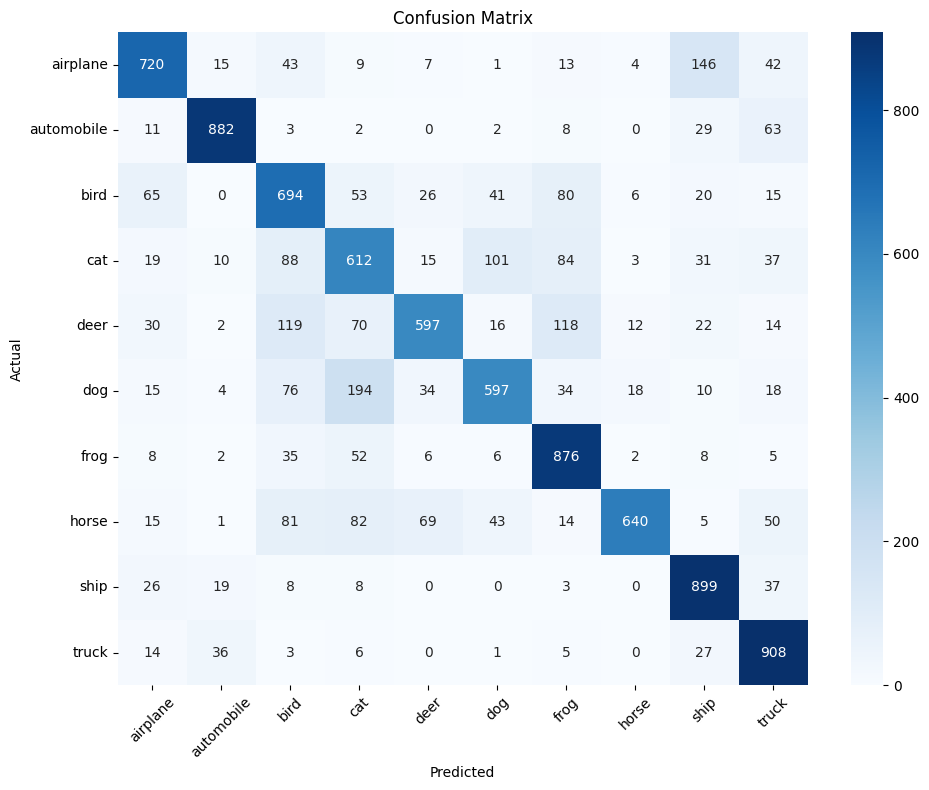


📊 Classification Report:
              precision    recall  f1-score   support

    airplane       0.78      0.72      0.75      1000
  automobile       0.91      0.88      0.89      1000
        bird       0.60      0.69      0.65      1000
         cat       0.56      0.61      0.59      1000
        deer       0.79      0.60      0.68      1000
         dog       0.74      0.60      0.66      1000
        frog       0.71      0.88      0.78      1000
       horse       0.93      0.64      0.76      1000
        ship       0.75      0.90      0.82      1000
       truck       0.76      0.91      0.83      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000



In [6]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"🎯 Final Test Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Make predictions and show confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, 
                          target_names=class_names))


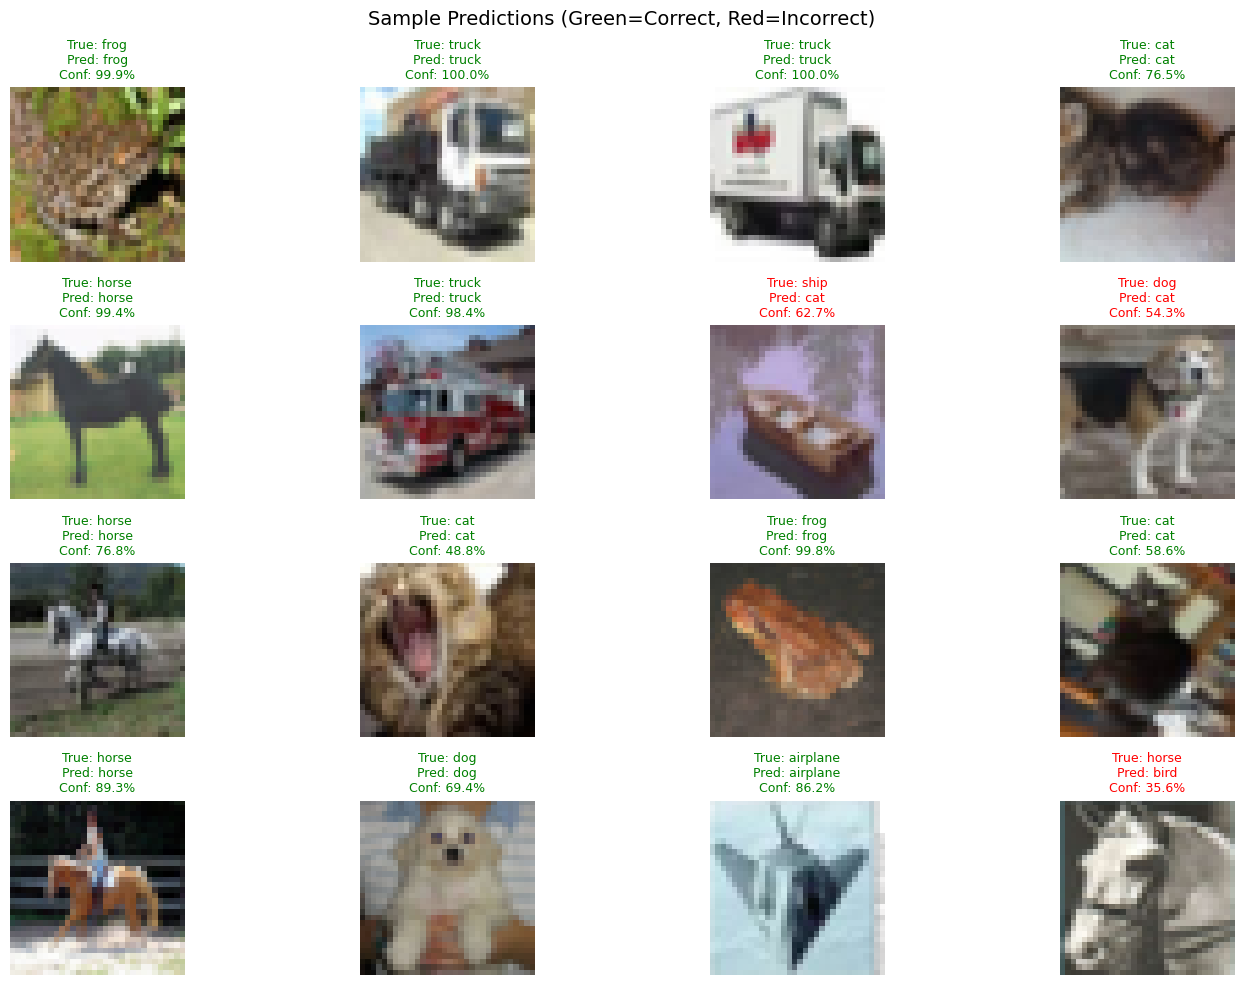

 Task 2: Deep Learning Project Complete!
✅ Final Model Accuracy: 74.25%


In [8]:
# Show sample predictions
plt.figure(figsize=(15, 10))
num_samples = 16

# Get random samples
sample_indices = np.random.choice(len(x_test), num_samples, replace=False)

for i, idx in enumerate(sample_indices):
    plt.subplot(4, 4, i+1)
    
    # Display image
    plt.imshow(x_test[idx])
    
    # Get prediction
    pred_probs = y_pred[idx]
    pred_class = np.argmax(pred_probs)
    true_class = np.argmax(y_test_cat[idx])
    confidence = pred_probs[pred_class] * 100
    
    # Set color based on correct/incorrect prediction
    color = 'green' if pred_class == true_class else 'red'
    
    plt.title(f'True: {class_names[true_class]}\n'
             f'Pred: {class_names[pred_class]}\n'
             f'Conf: {confidence:.1f}%', 
             color=color, fontsize=9)
    plt.axis('off')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=14)
plt.tight_layout()
plt.show()

print(" Task 2: Deep Learning Project Complete!")
print(f"✅ Final Model Accuracy: {test_accuracy*100:.2f}%")
